## Importing Stuff




In [8]:
!wget https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip

--2021-06-14 18:58:58--  https://s3.eu-central-1.amazonaws.com/avg-kitti/data_semantics.zip
Resolving s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)... 52.219.47.103
Connecting to s3.eu-central-1.amazonaws.com (s3.eu-central-1.amazonaws.com)|52.219.47.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327699796 (313M) [application/zip]
Saving to: ‘data_semantics.zip’

data_semantics.zip  100%[===================>] 312.52M  28.3MB/s    in 12s     

2021-06-14 18:59:11 (25.3 MB/s) - ‘data_semantics.zip’ saved [327699796/327699796]



In [9]:
!unzip data_semantics.zip -d data_semantics

Archive:  data_semantics.zip
   creating: data_semantics/testing/
   creating: data_semantics/testing/image_2/
  inflating: data_semantics/testing/image_2/000000_10.png  
  inflating: data_semantics/testing/image_2/000001_10.png  
  inflating: data_semantics/testing/image_2/000002_10.png  
  inflating: data_semantics/testing/image_2/000003_10.png  
  inflating: data_semantics/testing/image_2/000004_10.png  
  inflating: data_semantics/testing/image_2/000005_10.png  
  inflating: data_semantics/testing/image_2/000006_10.png  
  inflating: data_semantics/testing/image_2/000007_10.png  
  inflating: data_semantics/testing/image_2/000008_10.png  
  inflating: data_semantics/testing/image_2/000009_10.png  
  inflating: data_semantics/testing/image_2/000010_10.png  
  inflating: data_semantics/testing/image_2/000011_10.png  
  inflating: data_semantics/testing/image_2/000012_10.png  
  inflating: data_semantics/testing/image_2/000013_10.png  
  inflating: data_semantics/testing/image_2/00001

In [1]:
#i am about to begin. rip to the little sanity i had

#importing time

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as pyplt
import cv2
#ill add other libraries later



## Preparing Data

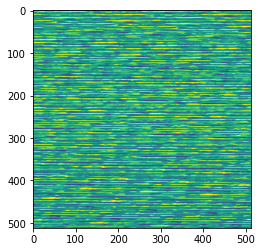

In [6]:
train_path = "data_semantics/training/image_2"
train_mask_path = "data_semantics/training/semantic"
image = cv2.imread(os.path.join(train_path,"000000_10.png"))
image_mask = cv2.imread(os.path.join(train_mask_path,"000000_10.png"))

image.resize((512,512))
image_mask.resize((128,128))

pyplt.imshow(image)

# I still don't know what to do :/

## UNet Model

In [7]:
# start with a 128x128, then halve till you get an 8x8, then go back up again
# I made the architecture, but without the data its not gonna go anywhere :(


def down_block(x,filters,filter_size = (3,3),stride = 1,padding = 'same'):

  c = keras.layers.Conv2D(filters,filter_size,strides=stride,padding=padding,activation='relu')(x)
  c = keras.layers.Conv2D(filters,filter_size,strides=stride,padding=padding,activation='relu')(c)
  p = keras.layers.MaxPool2D((2,2),(2,2))(c)
  return c,p

def up_block(x,filters,skip_layer,filter_size = (3,3),stride = 1,padding = 'same'):

  up_sample = keras.layers.UpSampling2D((2,2))(x)
  concatnt = keras.layers.Concatenate(axis=-1)([up_sample,skip_layer])
  c = keras.layers.Conv2D(filters,filter_size,strides=stride,padding=padding,activation='relu')(concatnt)
  c = keras.layers.Conv2D(filters,filter_size,strides=stride,padding=padding,activation='relu')(c)
  return c

def bottleneck(x,filters,filter_size = (3,3),stride = 1,padding = 'same'):
  c = keras.layers.Conv2D(filters,filter_size,strides=stride,padding=padding,activation='relu')(x)
  c = keras.layers.Conv2D(filters,filter_size,strides=stride,padding=padding,activation='relu')(c)
  return c

def UNet():
  inputs = keras.layers.Input((128,128,3))

  p0 = inputs
  c1,p1 = down_block(p0,16)
  c2,p2 = down_block(p1,32)
  c3,p3 = down_block(p2,64)#16
  c4,p4 = down_block(p3,128)#8

  c6 = bottleneck(p4,256)

  c7 = up_block(c6,c4,128)
  c8 = up_block(c7,c3,64)
  c9 = up_block(c8,c2,32)
  c10 = up_block(c9,c1,16)

  output = keras.layers.Conv2D(1,(1,1),(1,1),'same',activation = 'sigmoid')(c10)

  model = keras.models.Model(inputs,output)
  return model


model = UNet()
model.compile(optimizer = 'adam',loss = 'rmsprop',metrics = ['accuracy'])
model.fit(image,image_mask,epochs = 10)








IndexError: ignored